<a href="https://colab.research.google.com/github/JonathanJuradoS/Planificacion_Heuristica/blob/main/Caso3_Fabrica_Calzado_HC_vs_Random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🏭 Caso 3: Planificación de Producción en Fábrica de Calzado

## 📄 Descripción
Una fábrica artesanal de calzado debe planificar el orden de producción de 10 modelos distintos, considerando:
- Fechas límite de entrega
- Duración estimada de fabricación por modelo
- Disponibilidad de materiales

## 🎯 Objetivo
Optimizar el **orden de producción** para cumplir con las fechas de entrega y reducir los tiempos muertos.

## 📌 Actividad del Estudiante
- Definir una **heurística** que priorice pedidos urgentes y modelos rápidos.
- Implementar el algoritmo de **Hill Climbing**.
- Comparar con una **solución aleatoria**.
- Evaluar la eficiencia de ambas soluciones.


In [1]:

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Simular datos de 10 modelos de calzado
np.random.seed(42)
random.seed(42)

n_modelos = 10
modelos = [f"Modelo_{i+1}" for i in range(n_modelos)]
duraciones = np.random.randint(2, 8, size=n_modelos)  # duración entre 2 y 7 horas
urgencias = np.random.randint(1, 6, size=n_modelos)   # 1 = más urgente, 5 = menos urgente

df = pd.DataFrame({
    "Modelo": modelos,
    "Duración (h)": duraciones,
    "Urgencia (1-5)": urgencias
})
df = df.sort_values(by="Modelo").reset_index(drop=True)
df


,Modelo,Duración (h),Urgencia (1-5)
0,Modelo_1,5,4
1,Modelo_10,6,4
2,Modelo_2,6,3
3,Modelo_3,4,5
4,Modelo_4,6,2
5,Modelo_5,6,4
6,Modelo_6,3,2
7,Modelo_7,4,4
8,Modelo_8,4,5
9,Modelo_9,4,1



## 🎯 Heurística de Evaluación

Se priorizan los modelos con:
- Mayor urgencia (valor bajo)
- Menor duración

Se define un puntaje combinado:
\[
	ext{Score} = (5 - 	ext{Urgencia}) +
rac{1}{	ext{Duración}}
\]


In [2]:

def evaluar_orden(orden):
    score = 0
    for idx, i in enumerate(orden):
        urgencia = df.loc[i, "Urgencia (1-5)"]
        duracion = df.loc[i, "Duración (h)"]
        score += (5 - urgencia) + (1 / duracion)
    return -score  # Negativo porque se quiere minimizar



## ⛰️ Algoritmo Hill Climbing

Busca mejorar el orden actual intercambiando posiciones entre modelos y evaluando si mejora el puntaje.


In [3]:

def hill_climbing():
    orden = list(range(n_modelos))
    random.shuffle(orden)
    mejor_score = evaluar_orden(orden)

    for _ in range(1000):
        i, j = random.sample(range(n_modelos), 2)
        nuevo_orden = orden.copy()
        nuevo_orden[i], nuevo_orden[j] = nuevo_orden[j], nuevo_orden[i]
        nuevo_score = evaluar_orden(nuevo_orden)
        if nuevo_score < mejor_score:
            orden = nuevo_orden
            mejor_score = nuevo_score
    return orden, mejor_score

orden_hc, score_hc = hill_climbing()



## 🎲 Comparación: Solución Aleatoria

Se evalúa una solución completamente aleatoria para contrastar con Hill Climbing.


In [4]:

def solucion_aleatoria():
    orden = list(range(n_modelos))
    random.shuffle(orden)
    return orden, evaluar_orden(orden)

orden_rand, score_rand = solucion_aleatoria()


/tmp/ipython-input-6-767129904.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombres, rotation=45, ha='right')


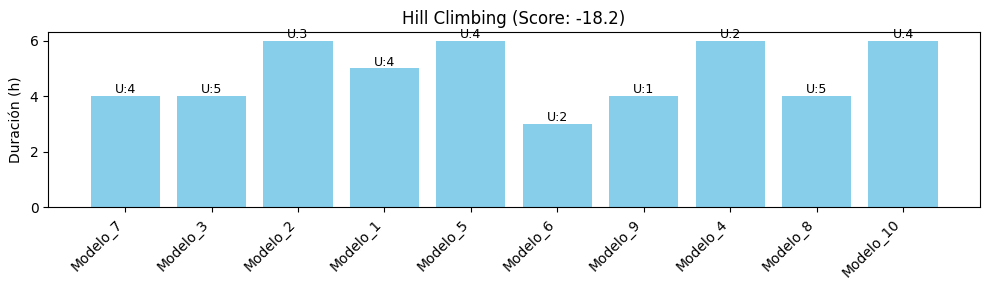

/tmp/ipython-input-6-767129904.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombres, rotation=45, ha='right')


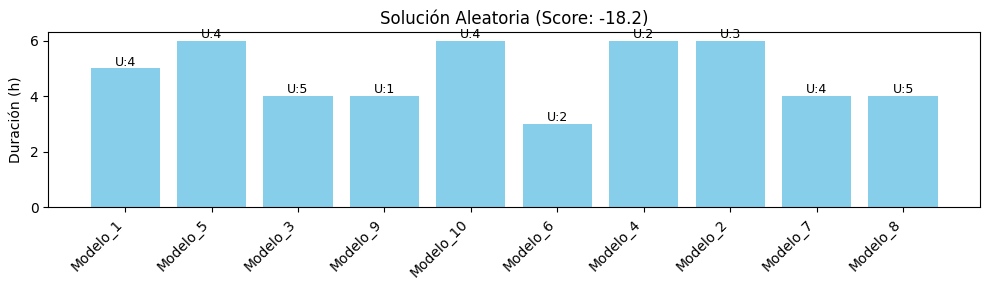

In [6]:

def visualizar_orden(orden, titulo):
    nombres = df.loc[orden, "Modelo"].values
    urgencias = df.loc[orden, "Urgencia (1-5)"].values
    duraciones = df.loc[orden, "Duración (h)"].values

    fig, ax = plt.subplots(figsize=(10, 3))
    bars = ax.bar(nombres, duraciones, color='skyblue')
    ax.set_title(titulo)
    ax.set_ylabel("Duración (h)")
    ax.set_xticklabels(nombres, rotation=45, ha='right')
    for bar, urg in zip(bars, urgencias):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"U:{urg}", ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

visualizar_orden(orden_hc, f"Hill Climbing (Score: {round(score_hc, 3)})")
visualizar_orden(orden_rand, f"Solución Aleatoria (Score: {round(score_rand, 3)})")



## ✅ Conclusiones

- La heurística combinada de **urgencia + duración** permite evaluar la eficiencia del orden propuesto.
- El algoritmo **Hill Climbing** encuentra un orden más eficiente que una solución aleatoria al iterar con mejoras locales.
- A pesar de su simplicidad, Hill Climbing puede ser muy útil para problemas de planificación cuando se dispone de una buena función heurística.
- Este ejercicio demuestra la aplicación real de algoritmos de búsqueda local para **optimizar la producción artesanal** con múltiples restricciones.

📌 Recomendación: integrar una validación con fechas reales de entrega para afinar la heurística.
